In [23]:
print("KUPPIREDDY BHAGEERATHA REDDY")
print("22BCE20355")

KUPPIREDDY BHAGEERATHA REDDY
22BCE20355


In [4]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the wine quality datasets with the correct delimiter
red_wine = pd.read_csv('winequality-red.csv', delimiter=';')
white_wine = pd.read_csv('winequality-white.csv', delimiter=';')

# Combine datasets for this example; you can choose to analyze them separately
data = pd.concat([red_wine, white_wine], ignore_index=True)

# Check column names
print("Columns in dataset:", data.columns)

# Ensure 'quality' column exists and use the correct name
if 'quality' not in data.columns:
    raise ValueError("Column 'quality' not found in the dataset.")

# Split the data into features and target
X = data.drop('quality', axis=1)
y = data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a PCA + Linear Regression pipeline
pca = PCA(n_components=3)
reg = LinearRegression()
pipeline = Pipeline(steps=[('pca', pca), ('reg', reg)])

# Fit the pipeline to the training data
pipeline.fit(X_train_scaled, y_train)

# Predict the labels for the test data
y_pred = pipeline.predict(X_test_scaled)

# Compute the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = pipeline.score(X_test_scaled, y_test)

# Print the number of features before and after PCA
print(f'Number of features before PCA: {X.shape[1]}')
print(f'Number of features after PCA: {pca.n_components_}')

# Print the evaluation metrics
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R^2: {r2:.2f}')


Columns in dataset: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Number of features before PCA: 11
Number of features after PCA: 3
MAE: 0.62
MSE: 0.62
RMSE: 0.79
R^2: 0.16


In [5]:
# Multiple Linear Regression With scikit-learn
# importing modules and packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing 

In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv('winequality-white.csv')

# Print the column names to check what is available
print("Column names in the dataset:")
print(df.columns)
print(df.head())

Column names in the dataset:
Index(['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'], dtype='object')
  fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0   7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6                                                                                                                     
1  6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...                                                                                                                     
2  8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...                                                                                                                     
3  7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...                                            

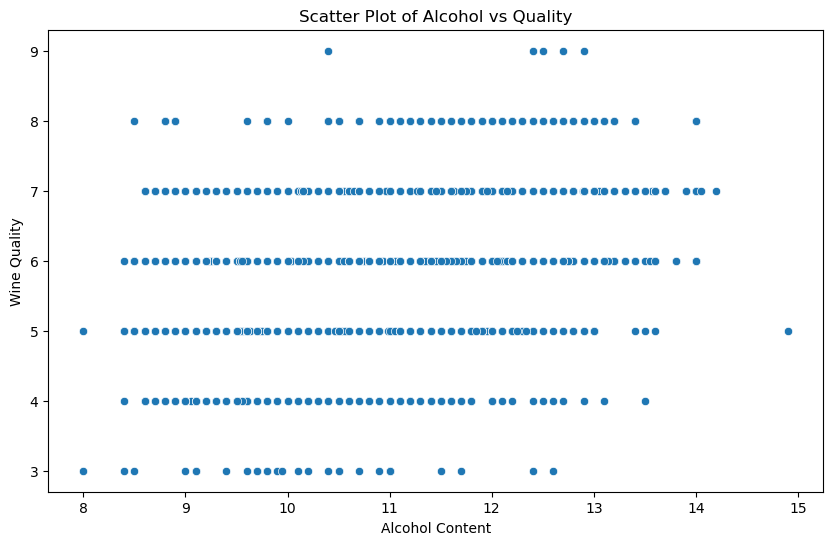

In [12]:
# Plot the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='quality', data=data)
plt.title('Scatter Plot of Alcohol vs Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Wine Quality')
plt.show()



In [13]:
# Create feature variables X and target variable y
X = data.drop('quality', axis=1)
y = data['quality']

# Print the feature variables and target variable
print("Feature Variables (X):")
print(X.head())

print("\nTarget Variable (y):")
print(y.head())

Feature Variables (X):
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8 

In [14]:
# creating train and test sets 
X_train, X_test, y_train, y_test = train_test_split( 
	X, y, test_size=0.3, random_state=101) 


In [15]:
# creating a regression model 
model = LinearRegression() 


In [16]:
# fitting the model 
model.fit(X_train,y_train)


LinearRegression()

In [17]:
# making predictions 
predictions = model.predict(X_test) 


In [18]:
# model evaluation 
print( 
'mean_squared_error : ', mean_squared_error(y_test, predictions)) 
print( 
'mean_absolute_error : ', mean_absolute_error(y_test, predictions)) 


mean_squared_error :  0.5336721195885855
mean_absolute_error :  0.5653209053122755


In [19]:
#Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train, y_train)
x_pred_ridge_test = ridge.predict(X_test)
r2_score(y_test, x_pred_ridge_test)

0.28190953338210223

In [20]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)
x_pred_lasso_test = lasso.predict(X_test)
r2_score(y_test, x_pred_lasso_test)

0.0026272984988234827

Columns in dataset: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Number of features before PCA: 11
Number of features after PCA: 3
MAE: 0.64
MSE: 0.67
RMSE: 0.82
R^2: 0.14


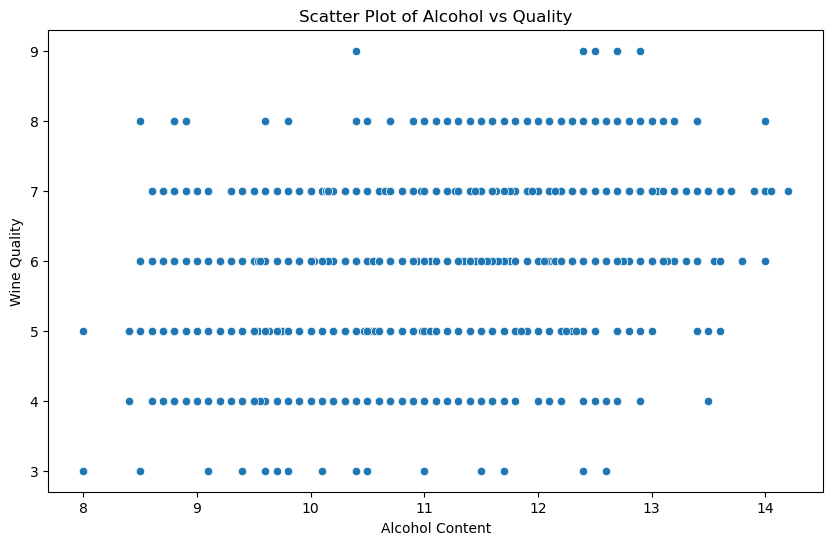

Mean Squared Error: 0.5690247717229225
Mean Absolute Error: 0.5862665383250457
R^2 Score for Ridge Regression: 0.2475239626925082
R^2 Score for Lasso Regression: 0.04850338611163929


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the white wine dataset
data = pd.read_csv('winequality-white.csv', delimiter=';')

# Check column names
print("Columns in dataset:", data.columns)

# Ensure 'quality' column exists
if 'quality' not in data.columns:
    raise ValueError("Column 'quality' not found in the dataset.")

# Split the data into features and target
X = data.drop('quality', axis=1)
y = data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a PCA + Linear Regression pipeline
pca = PCA(n_components=3)
reg = LinearRegression()
pipeline = Pipeline(steps=[('pca', pca), ('reg', reg)])

# Fit the pipeline to the training data
pipeline.fit(X_train_scaled, y_train)

# Predict the labels for the test data
y_pred = pipeline.predict(X_test_scaled)

# Compute the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = pipeline.score(X_test_scaled, y_test)

# Print the number of features before and after PCA
print(f'Number of features before PCA: {X.shape[1]}')
print(f'Number of features after PCA: {pca.n_components_}')

# Print the evaluation metrics
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R^2: {r2:.2f}')

# Plot the scatterplot for alcohol vs quality
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='quality', data=data)
plt.title('Scatter Plot of Alcohol vs Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Wine Quality')
plt.show()

# Create a regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

# Model evaluation
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))

# Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)
x_pred_ridge_test = ridge.predict(X_test)
print('R^2 Score for Ridge Regression:', r2_score(y_test, x_pred_ridge_test))

# Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)
x_pred_lasso_test = lasso.predict(X_test)
print('R^2 Score for Lasso Regression:', r2_score(y_test, x_pred_lasso_test))


Columns in dataset: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Number of features before PCA: 11
Number of features after PCA: 3
MAE: 0.53
MSE: 0.41
RMSE: 0.64
R^2: 0.37


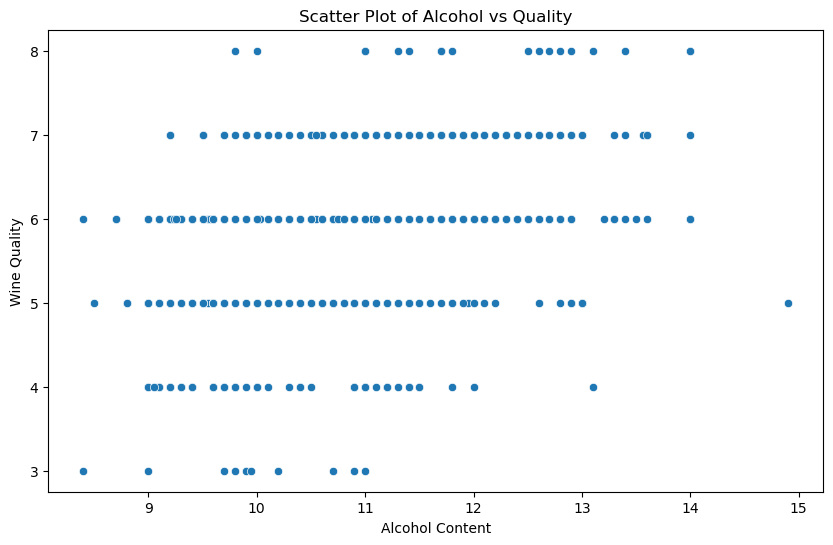

Mean Squared Error: 0.3900251439639543
Mean Absolute Error: 0.5035304415524379
R^2 Score for Ridge Regression: 0.39870643507758563
R^2 Score for Lasso Regression: 0.009014670905063582


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the red wine dataset
data = pd.read_csv('winequality-red.csv', delimiter=';')

# Check column names
print("Columns in dataset:", data.columns)

# Ensure 'quality' column exists
if 'quality' not in data.columns:
    raise ValueError("Column 'quality' not found in the dataset.")

# Split the data into features and target
X = data.drop('quality', axis=1)
y = data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a PCA + Linear Regression pipeline
pca = PCA(n_components=3)
reg = LinearRegression()
pipeline = Pipeline(steps=[('pca', pca), ('reg', reg)])

# Fit the pipeline to the training data
pipeline.fit(X_train_scaled, y_train)

# Predict the labels for the test data
y_pred = pipeline.predict(X_test_scaled)

# Compute the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = pipeline.score(X_test_scaled, y_test)

# Print the number of features before and after PCA
print(f'Number of features before PCA: {X.shape[1]}')
print(f'Number of features after PCA: {pca.n_components_}')

# Print the evaluation metrics
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R^2: {r2:.2f}')

# Plot the scatterplot for alcohol vs quality
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='quality', data=data)
plt.title('Scatter Plot of Alcohol vs Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Wine Quality')
plt.show()

# Create a regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

# Model evaluation
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))

# Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)
x_pred_ridge_test = ridge.predict(X_test)
print('R^2 Score for Ridge Regression:', r2_score(y_test, x_pred_ridge_test))

# Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)
x_pred_lasso_test = lasso.predict(X_test)
print('R^2 Score for Lasso Regression:', r2_score(y_test, x_pred_lasso_test))
